{'ndp': [78.12, 84.38, 84.38, 84.38, 90.62, 90.62], 'sage': [59.38, 59.38, 59.38, 59.38, 59.38, 59.38], 'dpdgc': [58.06, 58.06, 58.06, 58.06, 58.06, 58.06], 'gap': [65.62, 65.62, 65.62, 65.62, 65.62, 65.62]}


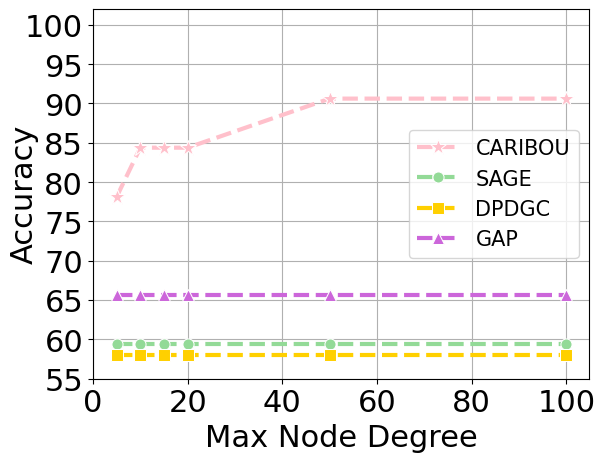

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import re
import pandas as pd

def extract_experiments(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
    
    experiments = []
    current_experiment = {}
    accuracies = []
    epsilon_line = False
    if 'inf' in file_path or 'gap' in file_path:
        starts = "the value of hops"
    else:
        starts = "the value of epsilon"
    
    for line in lines:
        
        accuracy_match = re.search(r'test/acc\s+(\d+\.\d+)', line)
        if accuracy_match:
            accuracies.append(float(accuracy_match.group(1)))
    
    if current_experiment:  # Save the last experiment
        current_experiment['max_accuracy'] = max(accuracies) if accuracies else None
        experiments.append(current_experiment)
    
    return max(accuracies) if accuracies else None

# extract_experiments("gcn_chains2_inf.txt")
import matplotlib.pyplot as plt
import numpy as np
import os
# import seaborn as sns
def get_ndp_results(model="ndp", group="hops", group2='epsilon', dataset='chains', exp_num=1, k=1, dpi=100, font_size=30, y_tick_interval=5, title_pad=20, max_degree=5):
    experiments = []
    gap_experiments = []
    accs = []
    for i in range(6):
        file_path = f'output_degree/{model}_{dataset}{exp_num}_e{2**i}_d{max_degree}.txt'
        accs.append(extract_experiments(file_path))
        # print(f"model: {model} dataset: {dataset} e: {2**i} d: {max_degree} acc: {accs[-1]}")
    return accs
    
import re
import pandas as pd
import numpy as np

def extract_experiments_gap(file_path):
    try:
        with open(file_path, 'r') as file:
            lines = file.readlines()
    except:
        return [None] * 6
    
    experiments = []
    current_experiment = {}
    accuracies = []
    epsilon_line = False
    if 'inf' in file_path or 'gap' in file_path:
        starts = "the value of hops"
    else:
        starts = "the value of epsilon"
    values = []
    for i in range(6):
        values.append([])
    for line in lines:
        if "epsilon" in line:
            current_epsilon = float(line.split(':')[2])
        
        accuracy_match = re.search(r'test/acc\s+(\d+\.\d+)', line)
        if accuracy_match:
            values[int(np.log2(current_epsilon))].append(float(accuracy_match.group(1)))
            # print(f"epsilon: {int(np.log2(current_epsilon))} accuracy: {float(accuracy_match.group(1))}")
    
    if current_experiment:  # Save the last experiment
        current_experiment['max_accuracy'] = max(accuracies) if accuracies else None
        experiments.append(current_experiment)
    for value in values:
        # print(value)
        accuracies.append(max(value))
    
    return accuracies

# extract_experiments("gcn_chains2_inf.txt")
import matplotlib.pyplot as plt
import numpy as np
# import seaborn as sns
def get_gap_results(model="ndp", group="hops", group2='epsilon', dataset='chains', exp_num=1, k=1, dpi=100, font_size=30, y_tick_interval=5, title_pad=20, max_degree=5):
    experiments = []
    gap_experiments = []
    file_path = f'output_degree/{model}_{dataset}{exp_num}_e_d{max_degree}.txt'
    accs = extract_experiments_gap(file_path)
    # print(accs)
    # for i in range(6):
        # print(f"model: {model} dataset: {dataset} e: {2**i} d: {max_degree} acc: {accs[i]}")
    return accs
    

def hops_ep_plot(epsilon=1, group2='epsilon', dataset='chains', exp_num='', degrees=[1,2,3,4,5], linemarkersize=10, 
                 infmarkersize=20, linemarker='*', infmarker='*', linestyle='--', disconnect=False, dpi=100, font_size=10, y_tick_interval=5, title_pad=10, markers=None, colors=None):
    # experiments = []
    # gap_experiments = []
    
    # gap_experiments += extract_experiments(f'gap_{dataset}{exp_num}_inf.txt')
    # gap_experiments += extract_experiments(f'gap_{dataset}{exp_num}_e.txt')


    # gap_experiments_df = pd.DataFrame(gap_experiments)
    # gap_experiments_df[group] = pd.to_numeric(gap_experiments_df[group], errors='coerce')
    # gap_experiments_df[group2] = pd.to_numeric(gap_experiments_df[group2], errors='coerce')
    # gap_experiments_df[group].fillna(-1, inplace=True)
    # gap_experiments_df[group2].fillna(-1, inplace=True)
    # gap_experiments_df['max_accuracy'] = pd.to_numeric(gap_experiments_df['max_accuracy'], errors='coerce')
    # # print(gap_experiments_df)
    # gap_experiments_df = gap_experiments_df[gap_experiments_df['hops'].isin(hops)]
    results = {}
    models = ["ndp", "sage", "dpdgc", "gap"]
    for model in models:
        results[model] = []
        for max_degree in degrees:  
            if model == "gap":
                results[model].append(get_gap_results(model=model, dataset=dataset, exp_num='', max_degree=max_degree)[int(np.log2(epsilon))])
            else:
                results[model].append(get_ndp_results(model=model, dataset=dataset, exp_num='', max_degree=max_degree)[int(np.log2(epsilon))])
    print(results)
    # Convert results dictionary to DataFrame format
    df_data = []
    for model in models:
        for i, degree in enumerate(degrees):
            df_data.append({
                'model': model,
                'degree': degree, 
                'max_accuracy': results[model][i]
            })
    results_df = pd.DataFrame(df_data)

    plti = 0
    plt.figure(dpi=dpi)
    plt.rcParams['font.size'] = font_size
    # markers = ['*', 'o', 's', '+']
    # colors = ['purple', 'brown', 'pink', '1f77b4']
    model_names = ["CARIBOU", "SAGE", "DPDGC", "GAP"]
    for i in range(len(models)):
        # subset = gap_experiments_df[gap_experiments_df['hops'] == hop]
        x_ticks = degrees
        if model_names[i] == "CARIBOU":
            marker_size = 12
        else:
            marker_size = linemarkersize
        if disconnect:
            # plt.scatter(x_ticks[0], subset.iloc[0]['max_accuracy'], color=sns.color_palette()[plti], marker=infmarker, s=infmarkersize, label=f'Hops: {hop} (First Point)')
            # print(i)
            sns.lineplot(data=results_df[results_df['model'] == models[i]], x='degree', y='max_accuracy', marker=markers[i], markersize=marker_size, linestyle=linestyle, label=f'{model_names[i]}', color=colors[i], linewidth=3)
        else:
            sns.lineplot(data=results_df[results_df['model'] == models[i]], x='degree', y='max_accuracy', marker=markers[i], markersize=marker_size, linestyle=linestyle, label=f'{model_names[i]}', color=colors[i], linewidth=3)
        plti += 1
        # plt.scatter(x_ticks[0], subset.iloc[0]['max_accuracy'], color=sns.color_palette()[0], marker=marker, s=markersize**2, label=f'Hops: {hop} (First Point)')
        # plt.xticks(x_ticks)  # Mark the x-axis values
        plt.grid(True)
    all_results = []
    for model in models:
        all_results += results[model]
    max_y = max(all_results)
    min_y = min(all_results)
    min_y = np.floor(min_y / y_tick_interval) * y_tick_interval
    max_y = np.ceil(max_y / y_tick_interval) * y_tick_interval
    max_y = 100
    if dataset == "chains1":
        min_y = 55
    else:
        min_y = 10
        y_tick_interval=15
    plt.yticks(np.arange(min_y, max_y + 1, y_tick_interval))
    plt.xticks([0,20,40,60,80,100])
    plt.xlabel("Max Node Degree")
    plt.ylabel('Accuracy', labelpad=-10)
    plt.ylim(min_y, 102)
    # plt.title(f'{dataset.capitalize()} Accuracy vs Max Node Degree $\epsilon = {epsilon}$', pad=title_pad)
    handles, labels = plt.gca().get_legend_handles_labels()
    line_handles = [handle for handle, label in zip(handles, labels) if 'First Point' not in label]
    line_labels = [label for label in labels if 'First Point' not in label]
    plt.legend(line_handles, line_labels, fontsize=15)
    os.makedirs("../../AE_outputs/CRV/D", exist_ok=True)
    plt.savefig(f'../../AE_outputs/CRV/D/acc_nodedegree_e{epsilon}_{dataset}.png', bbox_inches='tight')
    plt.show()
markers = ['*', 'o', 's', '^']
colors = ['pink', '#93da97', '#ffd000', '#cc66da']
hops_ep_plot(epsilon=2, dataset='chains1', exp_num='', degrees=[5,10,15,20,50,100], dpi=100, font_size=22, linemarkersize=8,
            infmarkersize=30, linemarker='*', infmarker='*', linestyle='--', disconnect=True, markers=markers, colors=colors)

{'ndp': [78.12, 75.0, 78.12, 78.12, 75.0, 81.25], 'sage': [59.38, 59.38, 59.38, 59.38, 59.38, 59.38], 'dpdgc': [58.06, 58.06, 58.06, 58.06, 58.06, 58.06], 'gap': [65.62, 65.62, 65.62, 65.62, 65.62, 65.62]}


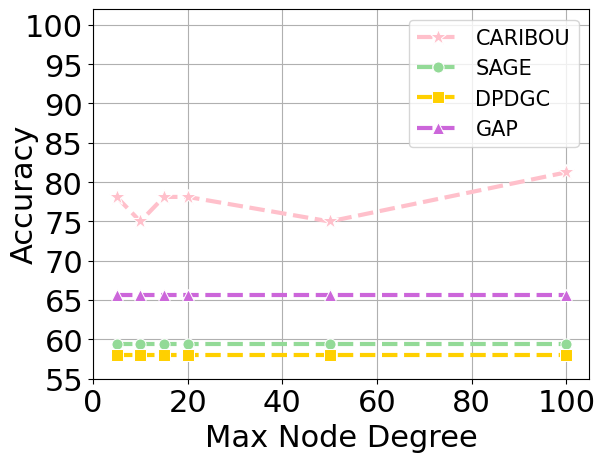

{'ndp': [78.12, 84.38, 84.38, 84.38, 90.62, 90.62], 'sage': [59.38, 59.38, 59.38, 59.38, 59.38, 59.38], 'dpdgc': [58.06, 58.06, 58.06, 58.06, 58.06, 58.06], 'gap': [65.62, 65.62, 65.62, 65.62, 65.62, 65.62]}


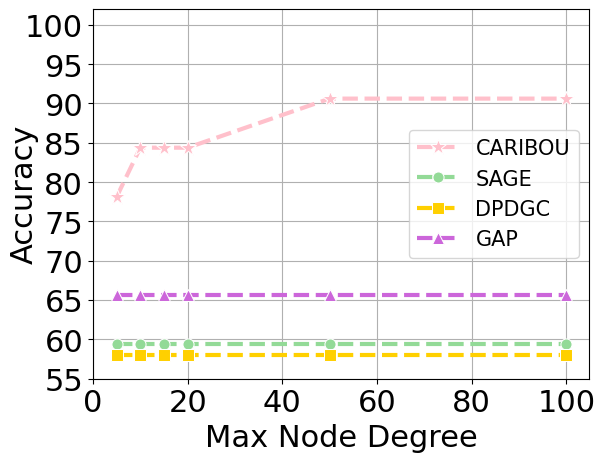

{'ndp': [78.12, 90.62, 90.62, 90.62, 90.62, 87.5], 'sage': [59.38, 59.38, 59.38, 59.38, 59.38, 59.38], 'dpdgc': [58.06, 58.06, 58.06, 58.06, 58.06, 58.06], 'gap': [65.62, 65.62, 65.62, 65.62, 65.62, 65.62]}


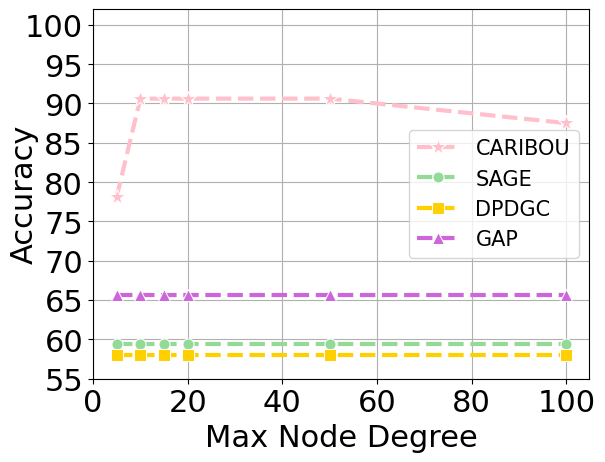

{'ndp': [75.0, 90.62, 90.62, 90.62, 87.5, 87.5], 'sage': [59.38, 59.38, 59.38, 59.38, 59.38, 59.38], 'dpdgc': [58.06, 58.06, 58.06, 58.06, 58.06, 58.06], 'gap': [65.62, 65.62, 65.62, 65.62, 65.62, 65.62]}


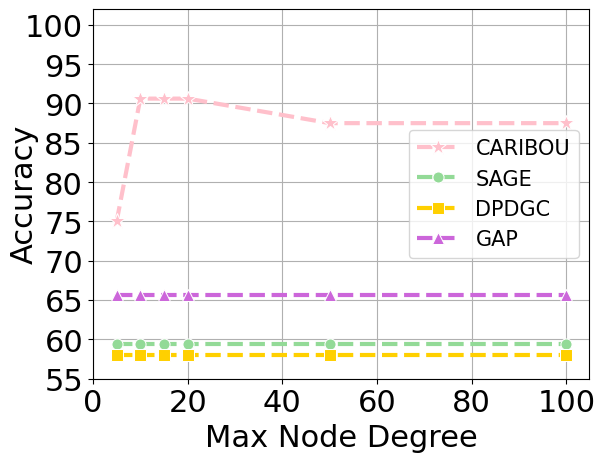

{'ndp': [71.88, 90.62, 90.62, 90.62, 90.62, 93.75], 'sage': [59.38, 59.38, 59.38, 59.38, 59.38, 59.38], 'dpdgc': [58.06, 58.06, 58.06, 58.06, 58.06, 58.06], 'gap': [65.62, 65.62, 65.62, 65.62, 65.62, 65.62]}


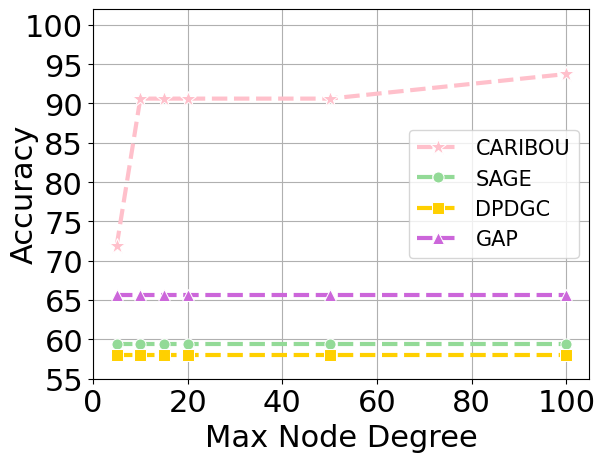

{'ndp': [68.75, 87.5, 87.5, 87.5, 87.5, 87.5], 'sage': [59.38, 59.38, 59.38, 59.38, 59.38, 59.38], 'dpdgc': [58.06, 58.06, 58.06, 58.06, 58.06, 58.06], 'gap': [62.5, 65.62, 65.62, 65.62, 65.62, 65.62]}


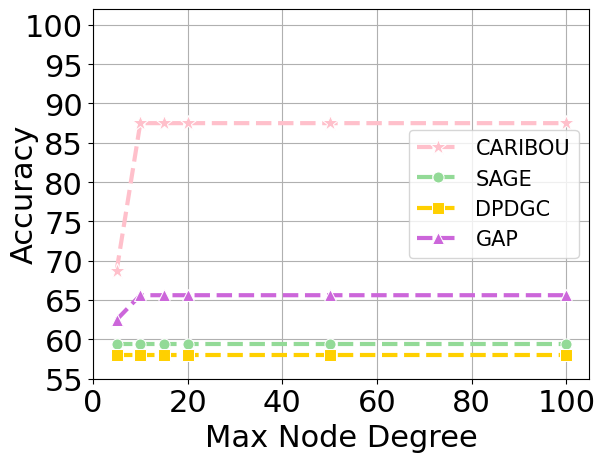

In [2]:
markers = ['*', 'o', 's', '^']
colors = ['pink', '#93da97', '#ffd000', '#cc66da']
linemarkersize = 8
font_size = 22
hops_ep_plot(epsilon=1, dataset='chains1', exp_num='', degrees=[5,10,15,20,50,100], dpi=100, font_size=font_size, linemarkersize=linemarkersize,
            infmarkersize=30, linemarker='*', infmarker='*', linestyle='--', disconnect=True, markers=markers, colors=colors)
hops_ep_plot(epsilon=2, dataset='chains1', exp_num='', degrees=[5,10,15,20,50,100], dpi=100, font_size=font_size, linemarkersize=linemarkersize,
            infmarkersize=30, linemarker='*', infmarker='*', linestyle='--', disconnect=True, markers=markers, colors=colors)
hops_ep_plot(epsilon=4, dataset='chains1', exp_num='', degrees=[5,10,15,20,50,100], dpi=100, font_size=font_size, linemarkersize=linemarkersize,
            infmarkersize=30, linemarker='*', infmarker='*', linestyle='--', disconnect=True, markers=markers, colors=colors)
hops_ep_plot(epsilon=8, dataset='chains1', exp_num='', degrees=[5,10,15,20,50,100], dpi=100, font_size=font_size, linemarkersize=linemarkersize,
            infmarkersize=30, linemarker='*', infmarker='*', linestyle='--', disconnect=True, markers=markers, colors=colors)
hops_ep_plot(epsilon=16, dataset='chains1', exp_num='', degrees=[5,10,15,20,50,100], dpi=100, font_size=font_size, linemarkersize=linemarkersize,
            infmarkersize=30, linemarker='*', infmarker='*', linestyle='--', disconnect=True, markers=markers, colors=colors)
hops_ep_plot(epsilon=32, dataset='chains1', exp_num='', degrees=[5,10,15,20,50,100], dpi=100, font_size=font_size, linemarkersize=linemarkersize,
            infmarkersize=30, linemarker='*', infmarker='*', linestyle='--', disconnect=True, markers=markers, colors=colors)


{'ndp': [95.1, 95.03, 94.83, 94.7, 94.7], 'sage': [22.8, 21.34, 21.07, 19.68, 18.89], 'dpdgc': [42.21, 41.42, 46.39, 47.71, 48.51], 'gap': [32.07, 31.68, 30.88, 31.94, 31.74]}


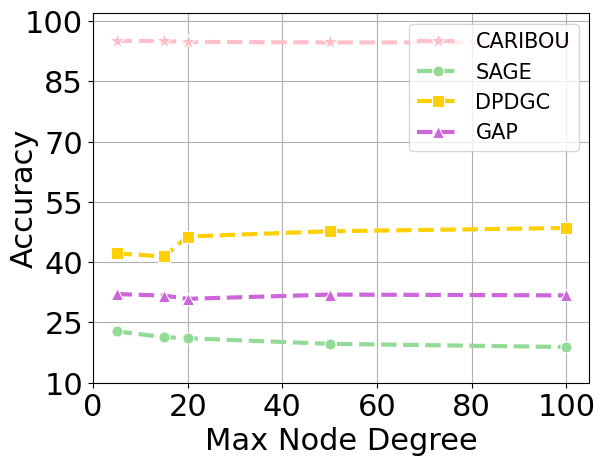

{'ndp': [94.76, 95.23, 95.1, 95.03, 94.83], 'sage': [23.92, 23.46, 23.46, 21.54, 20.08], 'dpdgc': [53.41, 52.95, 57.92, 59.31, 58.91], 'gap': [37.31, 36.91, 36.05, 37.84, 35.72]}


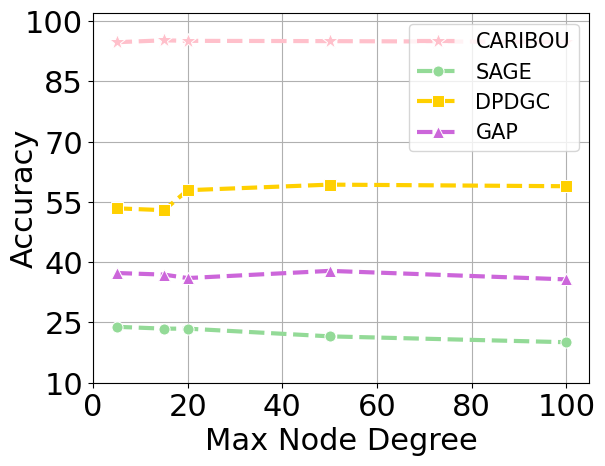

{'ndp': [94.9, 95.36, 95.36, 95.1, 95.29], 'sage': [25.38, 25.58, 25.78, 24.45, 22.27], 'dpdgc': [69.91, 68.92, 73.49, 73.49, 73.69], 'gap': [45.79, 45.66, 45.33, 45.66, 45.46]}


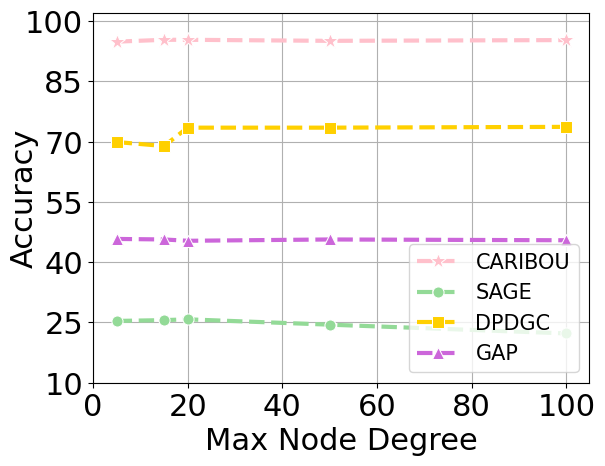

{'ndp': [94.96, 95.56, 95.29, 95.1, 95.29], 'sage': [27.17, 28.63, 28.36, 28.5, 26.11], 'dpdgc': [77.67, 78.0, 79.66, 79.92, 80.12], 'gap': [68.39, 68.59, 68.46, 68.65, 68.39]}


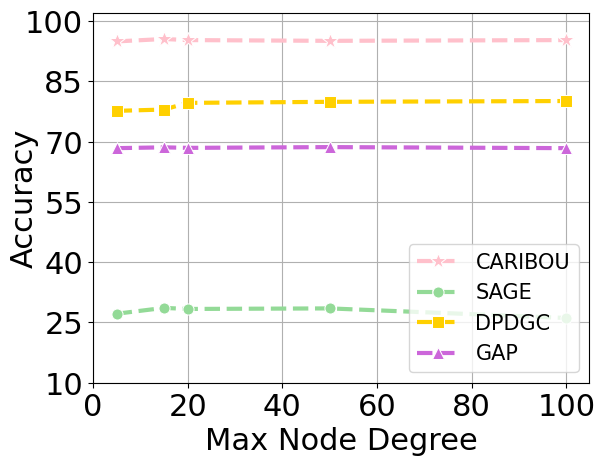

{'ndp': [94.96, 95.63, 95.29, 95.16, 95.23], 'sage': [29.62, 32.87, 33.47, 34.06, 30.75], 'dpdgc': [83.1, 83.76, 83.23, 83.57, 83.96], 'gap': [76.61, 76.67, 76.74, 76.54, 76.47]}


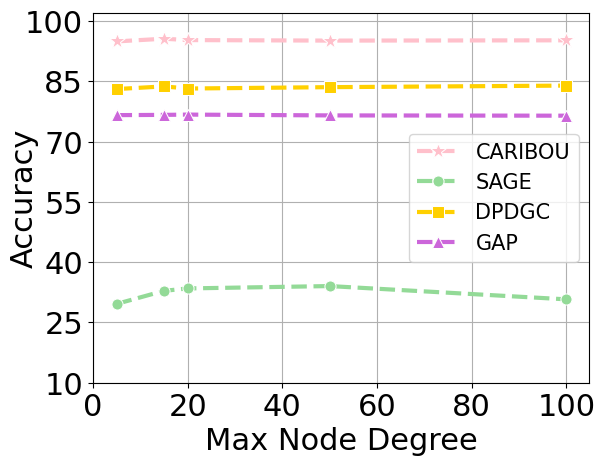

{'ndp': [94.9, 95.56, 95.36, 95.29, 95.36], 'sage': [34.13, 40.23, 41.68, 41.75, 37.57], 'dpdgc': [86.08, 86.94, 86.94, 86.88, 87.61], 'gap': [80.38, 80.38, 80.25, 80.05, 80.25]}


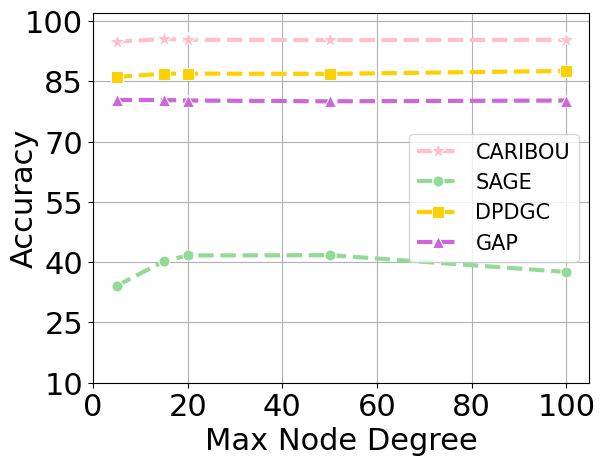

In [3]:
markers = ['*', 'o', 's', '^']
colors = ['pink', '#93da97', '#ffd000', '#cc66da']
linemarkersize = 8
font_size = 22
hops_ep_plot(epsilon=1, dataset='photo', exp_num='', degrees=[5,15,20,50,100], dpi=100, font_size=font_size, linemarkersize=linemarkersize,
            infmarkersize=30, linemarker='*', infmarker='*', linestyle='--', disconnect=True, markers=markers, colors=colors)
hops_ep_plot(epsilon=2, dataset='photo', exp_num='', degrees=[5,15,20,50,100], dpi=100, font_size=font_size, linemarkersize=linemarkersize,
            infmarkersize=30, linemarker='*', infmarker='*', linestyle='--', disconnect=True, markers=markers, colors=colors)
hops_ep_plot(epsilon=4, dataset='photo', exp_num='', degrees=[5,15,20,50,100], dpi=100, font_size=font_size, linemarkersize=linemarkersize,
            infmarkersize=30, linemarker='*', infmarker='*', linestyle='--', disconnect=True, markers=markers, colors=colors)
hops_ep_plot(epsilon=8, dataset='photo', exp_num='', degrees=[5,15,20,50,100], dpi=100, font_size=font_size, linemarkersize=linemarkersize,
            infmarkersize=30, linemarker='*', infmarker='*', linestyle='--', disconnect=True, markers=markers, colors=colors)
hops_ep_plot(epsilon=16, dataset='photo', exp_num='', degrees=[5,15,20,50,100], dpi=100, font_size=font_size, linemarkersize=linemarkersize,
            infmarkersize=30, linemarker='*', infmarker='*', linestyle='--', disconnect=True, markers=markers, colors=colors)
hops_ep_plot(epsilon=32, dataset='photo', exp_num='', degrees=[5,15,20,50,100], dpi=100, font_size=font_size, linemarkersize=linemarkersize,
            infmarkersize=30, linemarker='*', infmarker='*', linestyle='--', disconnect=True, markers=markers, colors=colors)